In [1]:
import os, shutil
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
model = load_model('cash_crop_4C_2D_2.h5')

In [3]:
def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor

In [4]:
def predict_plant(image_dir):
    img = load_image(image_dir, show = True)
    out = model.predict(img)
    print(out[0][0])
    if out[0][0] > .8:
        print('Hydrangea')
    elif out[0][0] < .2:
        print('Elephant Ear')
    else:
        print('Not a Hydrangea or Elephant Ear')

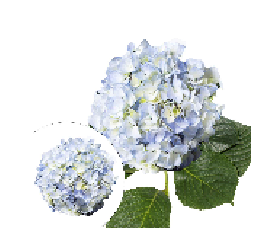

0.91820157
Hydrangea


In [5]:
predict_plant('/home/leafmonk/Documents/Cash Crop POC/predict/1.jpeg')

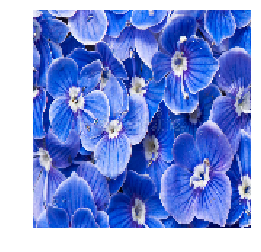

0.6168635
Not a Hydrangea or Elephant Ear


In [6]:
predict_plant('/home/leafmonk/Documents/Cash Crop POC/predict/blue.jpg')

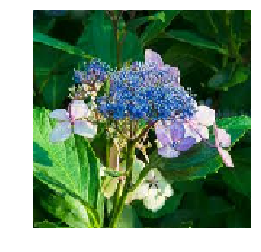

0.9998914
Hydrangea


In [7]:
predict_plant('/home/leafmonk/Documents/Cash Crop POC/predict/10.jpeg')

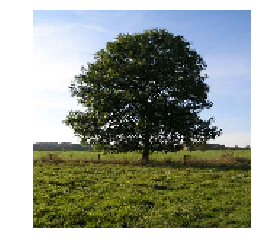

0.6655908
Not a Hydrangea or Elephant Ear


In [8]:
predict_plant('/home/leafmonk/Documents/Cash Crop POC/predict/tree.jpg')

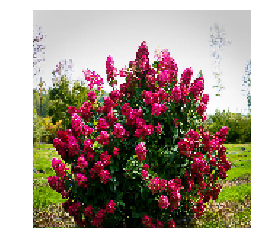

0.99857473
Hydrangea


In [9]:
predict_plant('/home/leafmonk/Documents/Cash Crop POC/predict/24.jpg')

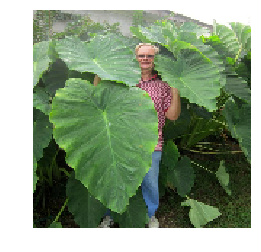

0.16627677
Elephant Ear


In [10]:
predict_plant('/home/leafmonk/Documents/Cash Crop POC/predict/669.jpg')

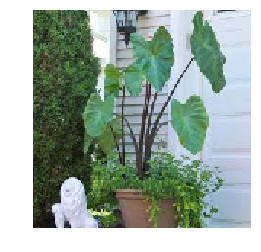

0.15871644
Elephant Ear


In [12]:
predict_plant('/home/leafmonk/Documents/Cash Crop POC/predict/12.jpeg')

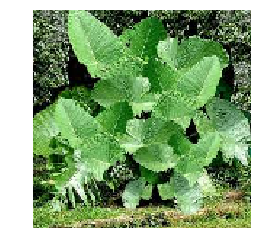

0.0019352168
Elephant Ear


In [16]:
predict_plant('/home/leafmonk/Documents/Cash Crop POC/predict/32.jpeg')

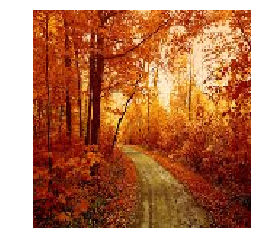

0.99849415
Hydrangea


In [19]:
predict_plant('/home/leafmonk/Documents/Cash Crop POC/predict/09.jpeg')

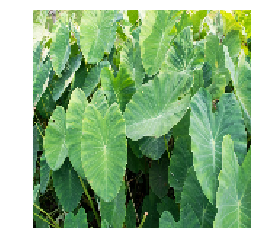

0.007605182
Elephant Ear


In [20]:
predict_plant('/home/leafmonk/Documents/Cash Crop POC/predict/12.jpg')